La distribucion exponencial surge como un modelo apropiado en muchas situaciones.
Suponga que la vida de un bombillo es exponencial con una media de 1000 horas
continuas de funcionamiento. Si necesitamos que un plajon tenga un bombillo encendido todo un año (365 dias), cuantos bombillos debemos tener de tal forma que, con una probabilidad de 0.99, no nos quedemos sin bombillos de reemplazo.



En el caso anterior asuma que el costo de un bombillo es 10.000.00 pesos y que el
costo de quedarse sin iluminacion es de 100.00 pesos por hora o fraccion de hora
(asuma que ud. solo puede comprar los bombillos al comienzo del año, o sea si se
quedo sin bombillos de repuestos no puede conseguir mas hasta que empiece el otro
año). Determine el numero optimo de bombillos que debe ud. tener al comienzo del
año (Explique detalladamente el razonamiento de su problema)
Razonamiento del problema de los bombillos



1. Costo por quedarse sin bombillos:

Este costo se produce cuando la cantidad de bombillos disponibles no es suficiente para cubrir el año completo.
Se calcula como el producto de la probabilidad de quedarse sin bombillos, la cantidad de horas sin luz y el costo por hora sin luz.
La probabilidad de quedarse sin bombillos aumenta al disminuir el número de bombillos comprados.
El costo por hora sin luz puede ser considerable, ya que implica la interrupción de actividades y la pérdida de productividad.

2. Costo de los bombillos:

Este costo se refiere al desembolso que se realiza al comprar los bombillos al inicio del año.
Se calcula como el producto del número de bombillos comprados por el costo individual de cada bombillo.
El costo de los bombillos aumenta al aumentar la cantidad de bombillos comprados.
Objetivo:




$expon from scipy.stats$ 

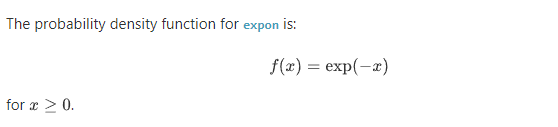

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
def bombillos_en_un_ano(aaaa, media=1000):
  """
  Simula el número de bombillos necesarios para un año.

  Parámetros:
    aaaa: Número de años a simular.
    media: Vida media del bombillo en horas.

  Retorno:
    Lista con el número de bombillos necesarios para cada año.
  """
  ##help(scipy.stats.expon.rvs)
  tiempo = 0
  nro_bombillos = 1
  resultados = []
  for _ in range(aaaa): # Ciclo que va a simular el número de bombillos necesarios para cada año
    while tiempo < 365  :  
      media_en_dias = media / 24 # Se convierte la vida media de los bombillos a días
      tiempo_bombillo = scipy.stats.expon.rvs(scale=media_en_dias) 
      tiempo += tiempo_bombillo # Se suma el tiempo que dura el bombillo
      nro_bombillos += 1 # Se suma un bombillo 
    resultados.append(nro_bombillos)
    tiempo = 0  
    nro_bombillos = 1 
  return resultados



# Simulamos 10000 años para obtener una buena estimación
resultados = bombillos_en_un_ano(10000, 1000)

# Define num_bombillos as the average number of bulbs used per year
num_bombillos = np.mean(resultados) 

# Probabilidad de quedarse sin bombillos
probabilidad_sin_bombillos = 1 - np.mean(np.array(resultados) <= num_bombillos) #Explicar que hace el mp.mean(...)


print(f"Probabilidad de quedarse sin bombillos: {probabilidad_sin_bombillos:.4f}") 



Probabilidad de quedarse sin bombillos: 0.5061


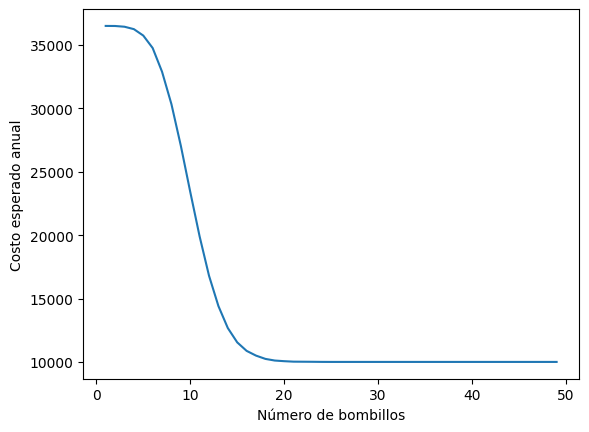

El número óptimo de bombillos que debe tener al comienzo del año es 25.


In [2]:
'''
Las siguientes variables son las modificables para el cálculo del costo esperado anual
'''

# Costos
costo_bombillo = 10000  # Costo de un bombillo 
costo_hora_sin_luz = 100  # Costo por hora sin luz

def costo_esperado(probabilidad_sin_bombillos, costo_bombillo, costo_hora_sin_luz):
  """
  Calcula el costo esperado para un año.

  Parámetros:
    probabilidad_sin_bombillos: Probabilidad de quedarse sin bombillos.
    costo_bombillo: Costo de un bombillo.
    costo_hora_sin_luz: Costo por hora sin luz.

  Retorno:
    Costo esperado para un año.
  """
  costo_sin_bombillos = 365  * costo_hora_sin_luz
  costo_total = (probabilidad_sin_bombillos * costo_sin_bombillos) + (
      (1 - probabilidad_sin_bombillos) * costo_bombillo
  ) # Se calcula el costo esperado anual sumando el costo de quedarse sin bombillos y el costo de los bombillos
  return costo_total

# Costos esperados para diferentes números de bombillos
costos_esperados = []
for num_bombillos in range(1, 50):
  probabilidad_sin_bombillos = 1 - np.mean(np.array(resultados) <= num_bombillos)
  costo_esperado_actual = costo_esperado(
      probabilidad_sin_bombillos, costo_bombillo, costo_hora_sin_luz
  )
  costos_esperados.append(costo_esperado_actual)

# Visualización
plt.plot(range(1, 50), costos_esperados)
plt.xlabel("Número de bombillos")
plt.ylabel("Costo esperado anual")
plt.show()

print(f"El número óptimo de bombillos que debe tener al comienzo del año es {np.argmin(costos_esperados) + 1}.")


Dos amigos quedan de encontrarse en el aeropuerto entre las 12 del d´ıa y la 1
p.m. Cada uno acuerda venir al aeropuerto durante la hora y esperar 20 minutos.
Encuentre la probabilidad que ellos efectivamente se encuentren.

In [3]:
import random

def encuentro(llegada_amigo1, llegada_amigo2):
  """
  Simula el encuentro de dos amigos en el aeropuerto.

  Parámetros:
    llegada_amigo1: Hora de llegada del amigo 1 (entre 0 y 60 minutos).
    llegada_amigo2: Hora de llegada del amigo 2 (entre 0 y 60 minutos).

  Retorno:
    True si se encuentran, False si no.
  """
  if abs(llegada_amigo1 - llegada_amigo2) <= 20:
    return True
  else:
    return False

# Simulamos 10000 encuentros
resultados = []
for _ in range(10000):
  llegada_amigo1 = random.randint(0, 60)
  llegada_amigo2 = random.randint(0, 60)
  resultados.append(encuentro(llegada_amigo1, llegada_amigo2))

# Probabilidad de encuentro
probabilidad_encuentro = np.mean(resultados)

print(f"Probabilidad de encuentro: {probabilidad_encuentro:.4f}")


Probabilidad de encuentro: 0.5578


En el problema de los amigos calcule la probabilidad si fueran 3 amigos los que
se fueran a encontrar, si fueran 4, si fueran 5, 6, 7, 8, 9, 10? Grafique el numero
de amigos vs. la probabilidad. Construya un modelo de regresi´on que exprese la
relacion X: numero de amigos vs. Y:probabilidad

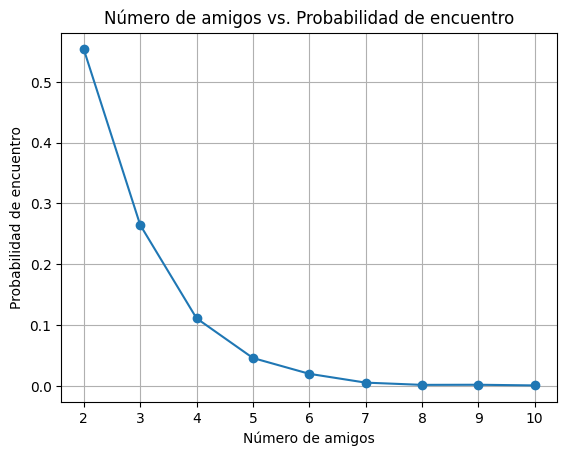

Coeficiente de la regresión: -0.0543
Intercepto de la regresión: 0.4375


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def encuentro(llegadas):
    """
    Simula el encuentro de varios amigos en el aeropuerto.

    Parámetros:
    llegadas: Lista de horas de llegada de los amigos (entre 0 y 60 minutos).

    Retorno:
    True si todos se encuentran, False si no.
    """
    for i in range(len(llegadas)):
        for j in range(i+1, len(llegadas)):
            if abs(llegadas[i] - llegadas[j]) > 20:
                return False
    return True

# Número de amigos
num_amigos = list(range(2, 11))

# Probabilidades de encuentro
probabilidades = []

for amigos in num_amigos:
    # Simulamos 10000 encuentros
    resultados = []
    for _ in range(10000):
        llegadas = [random.randint(0, 60) for _ in range(amigos)]
        resultados.append(encuentro(llegadas))

    # Probabilidad de encuentro
    probabilidad_encuentro = np.mean(resultados)
    probabilidades.append(probabilidad_encuentro)

# Gráfica de número de amigos vs. probabilidad
plt.plot(num_amigos, probabilidades, marker='o')
plt.xlabel('Número de amigos')
plt.ylabel('Probabilidad de encuentro')
plt.title('Número de amigos vs. Probabilidad de encuentro')
plt.grid(True)
plt.show()

# Modelo de regresión
X = np.array(num_amigos).reshape(-1, 1)
Y = np.array(probabilidades)
modelo = LinearRegression().fit(X, Y)

print(f"Coeficiente de la regresión: {modelo.coef_[0]:.4f}")
print(f"Intercepto de la regresión: {modelo.intercept_:.4f}")


En el problema de los amigos asuma que la distribucion de la espera es una
exponencial truncada, por ejemplo, si una persona llega a las 12 : 30, la
probabilidad que espere x minutos es exponencial truncada con parametro 5
minutos (El trncamiento depende de la hora a la que llegue). Repita el mismo
analisis bajo estas condiciones para el caso de dos amigos

In [3]:
import numpy as np
from scipy.stats import truncexpon

def encuentro(llegada_amigo1, llegada_amigo2):
    """
    Simula el encuentro de dos amigos en el aeropuerto.

    Parámetros:
    llegada_amigo1: Hora de llegada del amigo 1 (entre 0 y 60 minutos).
    llegada_amigo2: Hora de llegada del amigo 2 (entre 0 y 60 minutos).

    Retorno:
    True si se encuentran, False si no.
    """
    # Calcula el tiempo de espera para cada amigo
    espera_amigo1 = truncexpon.rvs(5, loc=llegada_amigo1, scale=60-llegada_amigo1)
    espera_amigo2 = truncexpon.rvs(5, loc=llegada_amigo2, scale=60-llegada_amigo2)

    # Verifica si los tiempos de espera se superponen
    if abs(espera_amigo1 - espera_amigo2) <= 20:
        return True
    else:
        return False

# Simula 10000 encuentros
resultados = []
for _ in range(10000):
    llegada_amigo1 = np.random.uniform(0, 60)
    llegada_amigo2 = np.random.uniform(0, 60)
    resultados.append(encuentro(llegada_amigo1, llegada_amigo2))

# Probabilidad de encuentro
probabilidad_encuentro = np.mean(resultados)

print(f"Probabilidad de encuentro: {probabilidad_encuentro:.4f}")


Probabilidad de encuentro: 0.4601


# Segunda Parte en R:
